# Linked Books Deep Reference Parsing

This notebook contains a brief analysis of the dataset used for this project.

> The data is expected to be in the **dataset** folder in root
> * Training dataset -> clean_train.txt
> * Testing dataset -> clean_test.txt
> * Validation dataset -> clean_valid.txt

In [1]:
### IMPORTS

# Matplot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Numpy
import numpy as np

# Counter for frequencies count
from collections import Counter

# Better print for arrays
import pprint

# Sort dict
from collections import OrderedDict
import operator
from operator import itemgetter

## Load data

Load in memory the dataset. 

The dataset is composed of words and the associated tags (Section `2.1 Dataset` of the paper). 
In the dataset, each word is associated with four tags, but in the context of this paper, the second tag is discarded.


In [2]:
def load_data(filepath):
    """
        Load and return the data stored in the given filepath.
        The data is structured as follows (CoNNL format): 
            Each line contains four columns separated by a single space. 
            Each word has been put on a separate line and there is an empty line after each sentence. 
            The first item on each line is a word, the second, third and fourth are tags associated to the word.
        
        Data example:
            The sentence "L. Antonielli, Iprefetti dell' Italia napoleonica, Bologna 1983." is represented in the dataset as:
            
                L author b-secondary b-r
                . author i-secondary i-r
                Antonielli author i-secondary i-r
                , author i-secondary i-r
                Iprefetti title i-secondary i-r
                dell title i-secondary i-r
                ’ title i-secondary i-r
                Italia title i-secondary i-r
                napoleonica title i-secondary i-r
                , title i-secondary i-r
                Bologna publicationplace i-secondary i-r
                1983 year e-secondary i-r
                . year e-secondary e-r
                
                
        :param filepath: Path to the data
        :return: Four arrays: The first one contains sentences (one array of words per sentence) and the other threes are arrays of tags.
    """

    # Arrays to return
    words = []
    tags_1 = []
    tags_2 = []
    tags_3 = []

    word = tags1 = tags2 = tags3 = []
    with open (filepath, "r") as file:
        for line in file:
            if 'DOCSTART' not in line: #Do not take the first line into consideration
                # Check if empty line
                if line in ['\n', '\r\n']:
                    # Append line
                    words.append(word)
                    tags_1.append(tags1)
                    tags_2.append(tags2)
                    tags_3.append(tags3)

                    # Reset
                    word = []
                    tags1 = []
                    tags2 = []
                    tags3 = []

                else:
                    # Split the line into words, tag #1, tag #2, tag #3
                    w = line[:-1].split(" ")
                    word.append(w[0])
                    tags1.append(w[1])
                    tags2.append(w[2])
                    tags3.append(w[3])

    return words,tags_1,tags_2,tags_3

In [3]:
# Training data
train_w, train_t1, train_t2, train_t3 = load_data("dataset/clean_train.txt")

# Testing data
test_w, test_t1, test_t2, test_t3 = load_data("dataset/clean_test.txt")

# Validation data
validation_w, validation_t1, validation_t2, validation_t3 = load_data("dataset/clean_valid.txt")

The variable **train_w** is an array of array, where is array corresponds to a line in a document. For each word in a line, the associated tag for `Task 1: Reference components` is in variable **train_t1**. The tags for `Task 2: Reference typology` are in variable **train_t2** and the tags for `Task 3: Reference span` in variable **train_t3**. The same logic is used for testing data (**test_**) and validation data (**validation_**).

# Data facts

In [4]:
words = [train_w, test_w, validation_w]


def plot_list(values,
              size,
              title,
              xlabel,
              ylabel,
              y=["Training", "Testing", "Validation"]):
    values.reverse()
    y.reverse()
    plt.figure(figsize=size)
    plt.barh(range(len(values)), values, align='center')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(range(len(y)), y)
    plt.show()

### Number of sentences

Number of training sentences   : 49616
Number of testing sentences    : 2258
Number of validation sentences : 2436


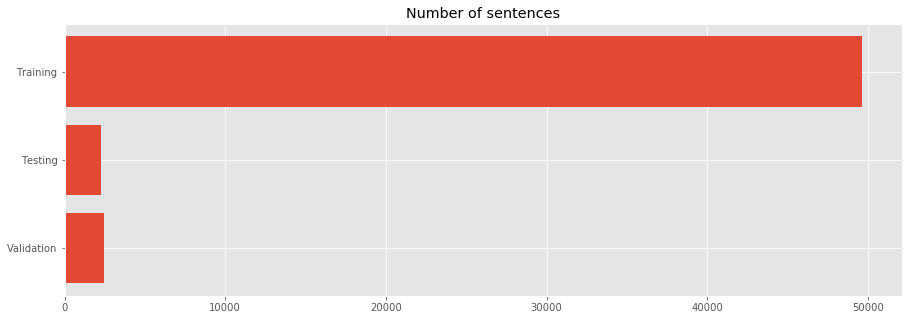

In [5]:
values = [len(data) for data in words]

print("{0:<30} : {1:.0f}".format("Number of training sentences", values[0]))
print("{0:<30} : {1:.0f}".format("Number of testing sentences", values[1]))
print("{0:<30} : {1:.0f}".format("Number of validation sentences", values[2]))

plot_list(values, (15, 5), "Number of sentences", "", "")

### Total number of words

Total number of training words           : 828394
Total number of testing words            : 30876
Total number of validation words         : 27177


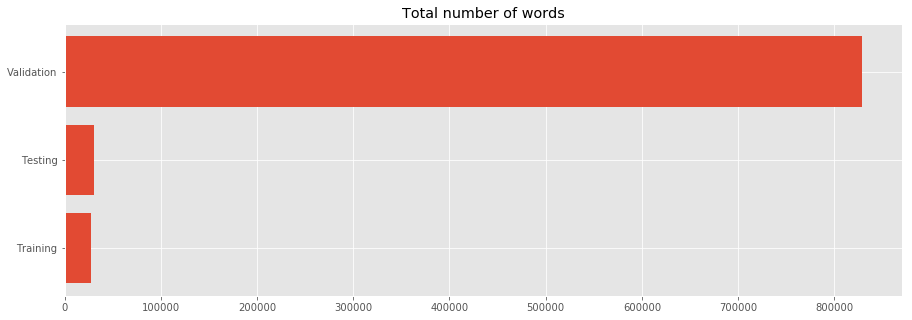

In [6]:
values = [len([x for y in data for x in y]) for data in words]

print("{0:<40} : {1:.0f}".format("Total number of training words", values[0]))
print("{0:<40} : {1:.0f}".format("Total number of testing words", values[1]))
print(
    "{0:<40} : {1:.0f}".format("Total number of validation words", values[2]))

plot_list(values, (15, 5), "Total number of words", "", "")

### Average number of words per sentence

Average number of words per sentence in training data        : 16.70,  (max: 73)
Average number of words per sentence in testing data         : 13.67,  (max: 30)
Average number of words per sentence in validation data      : 11.16,  (max: 35)


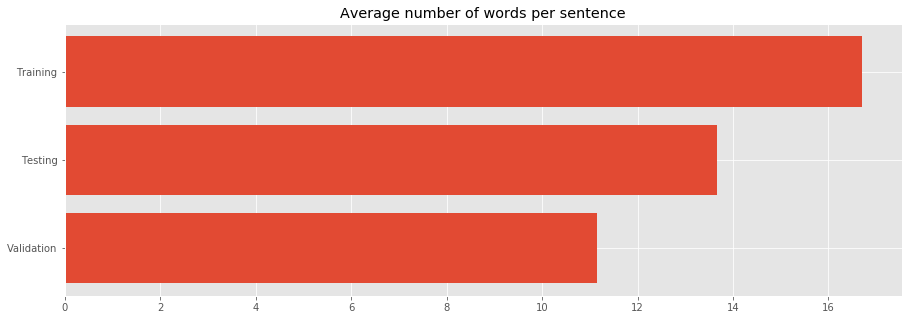

In [7]:
def avg(x):
    return sum(x) / len(x)


values = [avg([len(x) for x in data]) for data in words]

print("{0:<60} : {1:.2f},  (max: {2})".format(
    "Average number of words per sentence in training data", values[0],
    max([len(x) for x in words[0]])))
print("{0:<60} : {1:.2f},  (max: {2})".format(
    "Average number of words per sentence in testing data", values[1],
    max([len(x) for x in words[1]])))
print("{0:<60} : {1:.2f},  (max: {2})".format(
    "Average number of words per sentence in validation data", values[2],
    max([len(x) for x in words[2]])))

plot_list(values, (15, 5), "Average number of words per sentence", "", "")

### Most used words

In [8]:
def most_used_words(data, name, n=20):
    print("====== {} ======".format(name))
    w = [x for y in data for x in y]
    cnt = Counter(w)

    print(n, "most commomn words in {0} dataset :".format(name))
    pprint.pprint(cnt.most_common(n))
    print()


most_used_words(train_w, "Training")
most_used_words(test_w, "Testing")
most_used_words(validation_w, "Validation")

====== Training ======
20 most commomn words in Training dataset :
[('.', 94146),
 (',', 89818),
 ('-', 21674),
 ('(', 15631),
 ('di', 13826),
 ('.,', 10515),
 ('e', 10147),
 ('in', 9131),
 (')', 8364),
 ('’', 6789),
 ('p', 6729),
 ('pp', 6676),
 ('Venezia', 5932),
 ('del', 5658),
 (';', 5508),
 (':', 4372),
 ('a', 4341),
 ('A', 4305),
 ('),', 3953),
 ('«', 3906)]

====== Testing ======
20 most commomn words in Testing dataset :
[(',', 3111),
 ('.', 2564),
 ('-', 886),
 ('di', 621),
 ('.,', 486),
 ('Venezia', 480),
 ('in', 429),
 ('e', 400),
 ('(', 328),
 (':', 257),
 ('’', 256),
 ('del', 211),
 ('a', 194),
 ('della', 186),
 ('«', 178),
 ('),', 177),
 ('»,', 156),
 ('of', 153),
 ('G', 150),
 ('and', 148)]

====== Validation ======
20 most commomn words in Validation dataset :
[(',', 2990),
 ('.', 2261),
 ('-', 1024),
 ('di', 654),
 ('Venezia', 561),
 ('e', 361),
 ('in', 359),
 ('’', 350),
 ('(', 319),
 ('a', 204),
 ('del', 202),
 (':', 196),
 ('.,', 190),
 ('),', 189),
 ('pp', 170),
 (

### Words Frequency

====== Training ======
  Words appearing 1 time  =>  34848 (58.08%)
  Words appearing 2 time  =>  8236 (13.73%)
  Words appearing 3 time  =>  3892 (6.49%)
  Words appearing 4 time  =>  2333 (3.89%)
  Words appearing 5 time  =>  1523 (2.54%)
  Words appearing 6 time  =>  1222 (2.04%)
  Words appearing 7 time  =>  832 (1.39%)
  Words appearing 8 time  =>  697 (1.16%)
  Words appearing 9 time  =>  564 (0.94%)
  Words appearing 10 time  =>  453 (0.76%)
  ...
  Words appearing +100 time  =>  711 (1.19%)


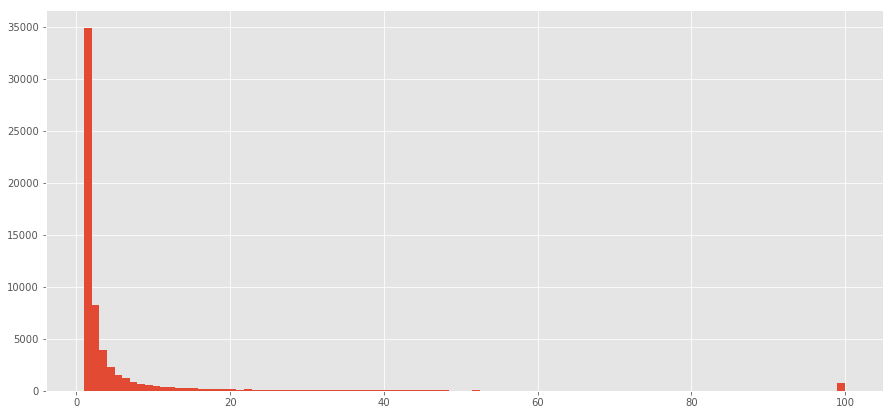

====== Testing ======
  Words appearing 1 time  =>  4814 (67.71%)
  Words appearing 2 time  =>  977 (13.74%)
  Words appearing 3 time  =>  392 (5.51%)
  Words appearing 4 time  =>  230 (3.23%)
  Words appearing 5 time  =>  134 (1.88%)
  Words appearing 6 time  =>  92 (1.29%)
  Words appearing 7 time  =>  58 (0.82%)
  Words appearing 8 time  =>  43 (0.60%)
  Words appearing 9 time  =>  41 (0.58%)
  Words appearing 10 time  =>  35 (0.49%)
  ...
  Words appearing +100 time  =>  27 (0.38%)


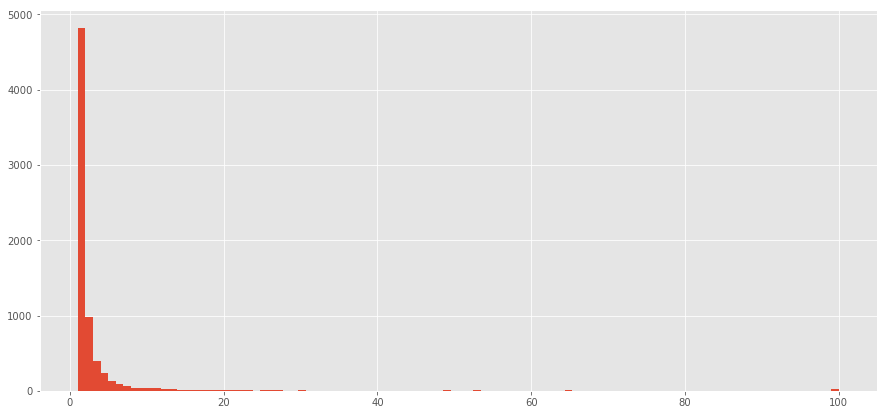

====== Validation ======
  Words appearing 1 time  =>  4038 (65.53%)
  Words appearing 2 time  =>  933 (15.14%)
  Words appearing 3 time  =>  379 (6.15%)
  Words appearing 4 time  =>  200 (3.25%)
  Words appearing 5 time  =>  130 (2.11%)
  Words appearing 6 time  =>  77 (1.25%)
  Words appearing 7 time  =>  61 (0.99%)
  Words appearing 8 time  =>  41 (0.67%)
  Words appearing 9 time  =>  23 (0.37%)
  Words appearing 10 time  =>  32 (0.52%)
  ...
  Words appearing +100 time  =>  22 (0.36%)


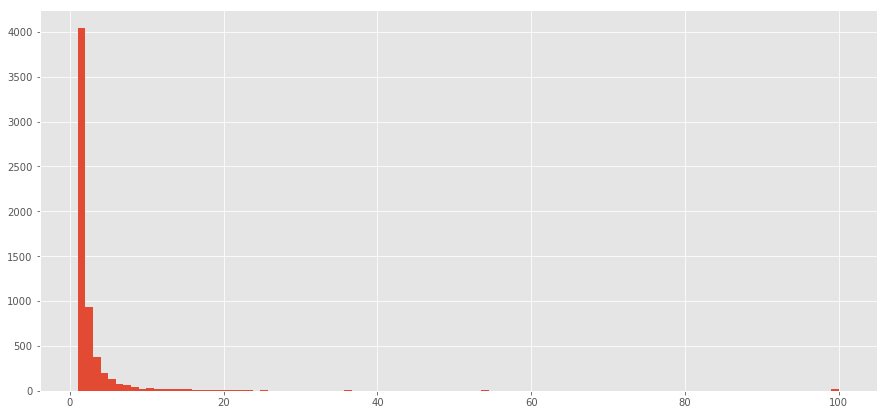

In [9]:
def words_frequency(data, name):
    print("====== {} ======".format(name))
    w = [x for y in data for x in y]
    cnt = Counter(w)
    wf = list(cnt.values())
    wf = [x if x < 100 else 100 for x in wf]

    for i in range(1, 11):
        y = len([x for x in wf if x == i])
        print("  Words appearing {0} time  =>  {1} ({2:.2f}%)".format(
            i, y, 100 * y / len(wf)))

    print("  ...")
    i = 100
    y = len([x for x in wf if x == i])
    print("  Words appearing +{0} time  =>  {1} ({2:.2f}%)".format(
        i, y, 100 * y / len(wf)))

    plt.figure(figsize=(15, 7))
    plt.hist(wf, bins=100)
    plt.show()


words_frequency(train_w, "Training")
words_frequency(test_w, "Testing")
words_frequency(validation_w, "Validation")

### Tags

In [10]:
tags1 = [train_t1, test_t1, validation_t1]
tags2 = [train_t2, test_t2, validation_t2]
tags3 = [train_t3, test_t3, validation_t3]

In [11]:
print("Tags for Task 1: ")
print('\n'.join(
    ["  " + x for x in np.unique([x for d in tags1 for y in d for x in y])]))
print()

print("Tags for Task 2: ")
print('\n'.join(
    ["  " + x for x in np.unique([x for d in tags2 for y in d for x in y])]))
print()

print("Tags for Task 3: ")
print('\n'.join(
    ["  " + x for x in np.unique([x for d in tags3 for y in d for x in y])]))
print()

Tags for Task 1: 
  abbreviation
  archivalreference
  archive_lib
  attachment
  author
  box
  cartulation
  column
  conjunction
  date
  filza
  folder
  foliation
  numbered_ref
  o
  pagination
  publicationnumber-year
  publicationplace
  publicationspecifications
  publisher
  ref
  registry
  series
  title
  tomo
  volume
  year

Tags for Task 2: 
  b-meta-annotation
  b-primary
  b-secondary
  e-meta-annotation
  e-primary
  e-secondary
  i-meta-annotation
  i-primary
  i-secondary
  o

Tags for Task 3: 
  b-r
  e-r
  i-r
  o



==== Task 1 =====
Number of unique tags in training data for Task 1       : 27.00
Number of unique tags in testing data for Task 1        : 25.00
Number of unique tags in validation data for Task 1     : 24.00


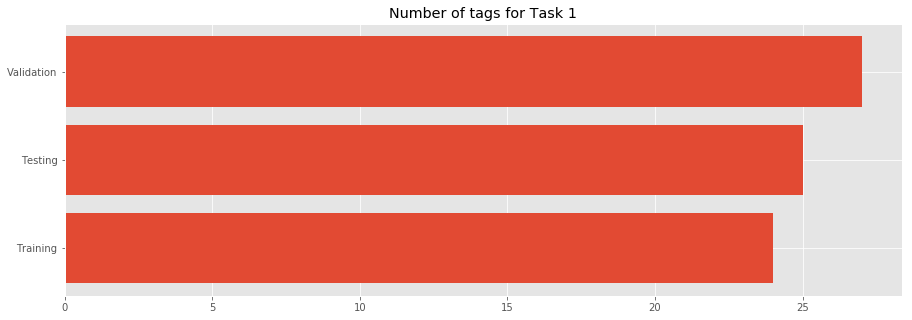



==== Task 2 =====
Number of unique tags in training data for Task 2       : 10.00
Number of unique tags in testing data for Task 2        : 10.00
Number of unique tags in validation data for Task 2     : 10.00


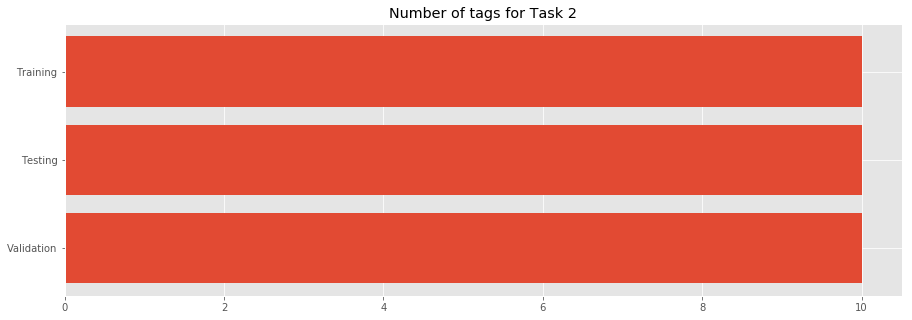



==== Task 3 =====
Number of unique tags in training data for Task 3       : 4.00
Number of unique tags in testing data for Task 3        : 4.00
Number of unique tags in validation data for Task 3     : 4.00


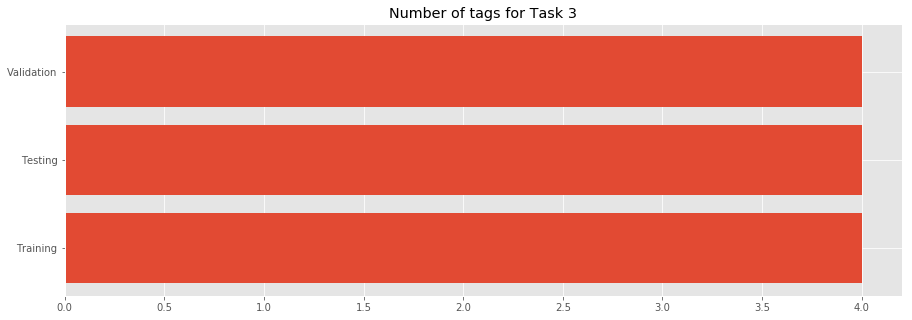

In [12]:
for i, tags in enumerate([tags1, tags2, tags3]):
    values = [len(np.unique([x for y in d for x in y])) for d in tags]
    print("==== Task", 1 + i, "=====")
    print("{0:<55} : {1:.2f}".format(
        "Number of unique tags in training data for Task {}".format(
            i + 1), values[0]))
    print("{0:<55} : {1:.2f}".format(
        "Number of unique tags in testing data for Task {}".format(
            i + 1), values[1]))
    print("{0:<55} : {1:.2f}".format(
        "Number of unique tags in validation data for Task {}".format(
            i + 1), values[2]))
    plot_list(values, (15, 5), "Number of tags for Task {}".format(i + 1), "",
              "")
    print()
    print()

> Some tags are present in the Training data but will never be tested for Task 1.

### Average tags in sentence

In [13]:
values = [[len(np.unique(s)) for s in d] for d in tags1]

print("{0:<60} : {1:.2f},  (max: {2})".format(
    "Average unique tags per sentence in training data - Task 1",
    avg(values[0]), max(values[0])))
print("{0:<60} : {1:.2f},  (max: {2})".format(
    "Average unique tags per sentence in testing data -Task 1",
    avg(values[1]), max(values[1])))
print("{0:<60} : {1:.2f},  (max: {2})".format(
    "Average unique tags per sentence in validation data - Task 1",
    avg(values[2]), max(values[2])))

Average unique tags per sentence in training data - Task 1   : 3.30,  (max: 10)
Average unique tags per sentence in testing data -Task 1     : 2.91,  (max: 7)
Average unique tags per sentence in validation data - Task 1 : 2.49,  (max: 7)


### Tags frequency - Training Data

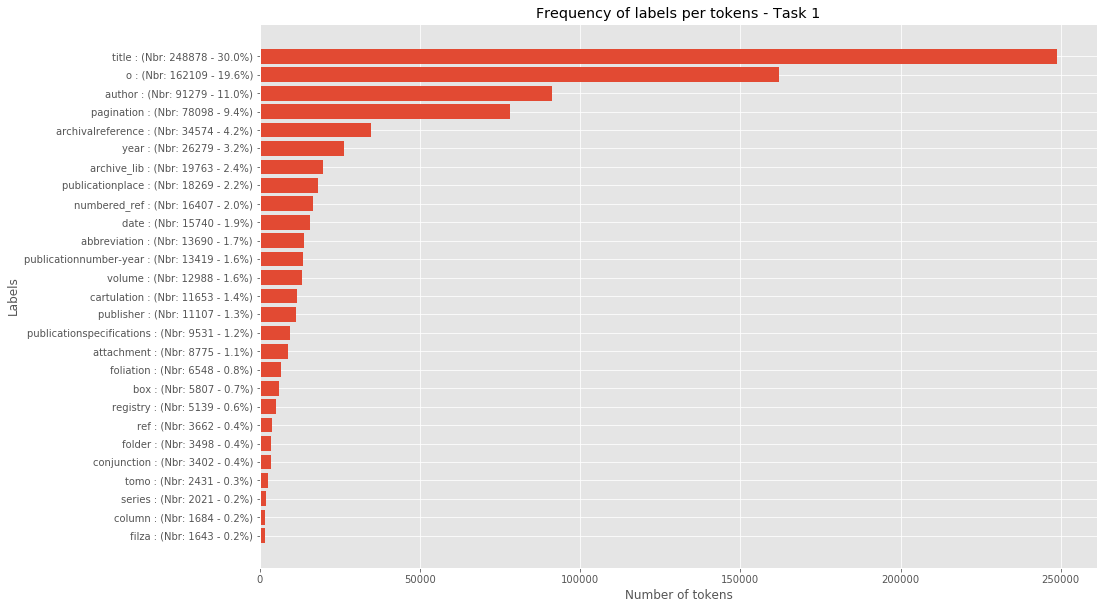

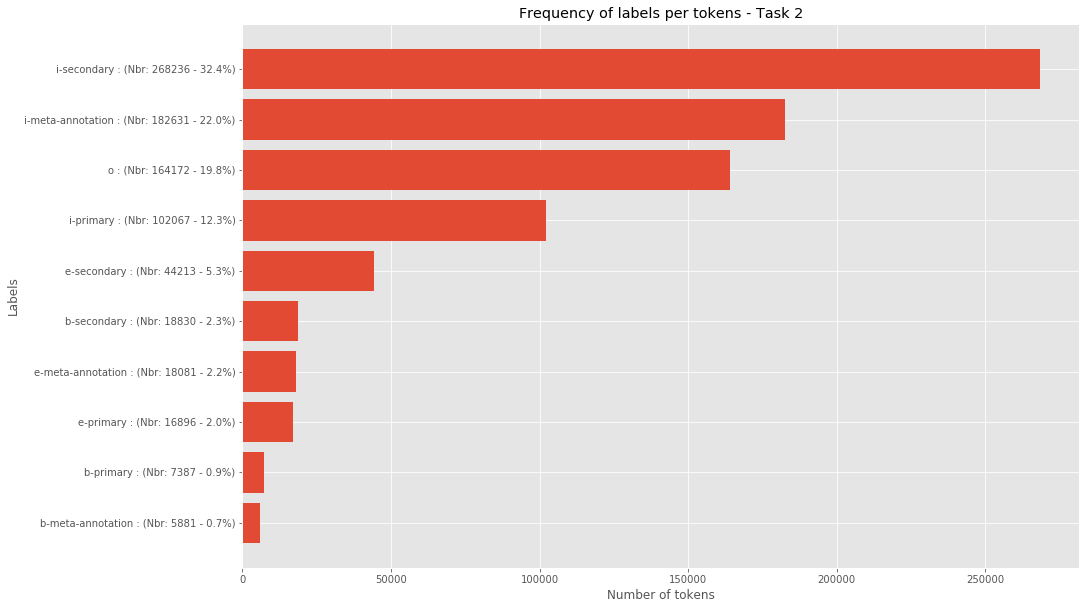

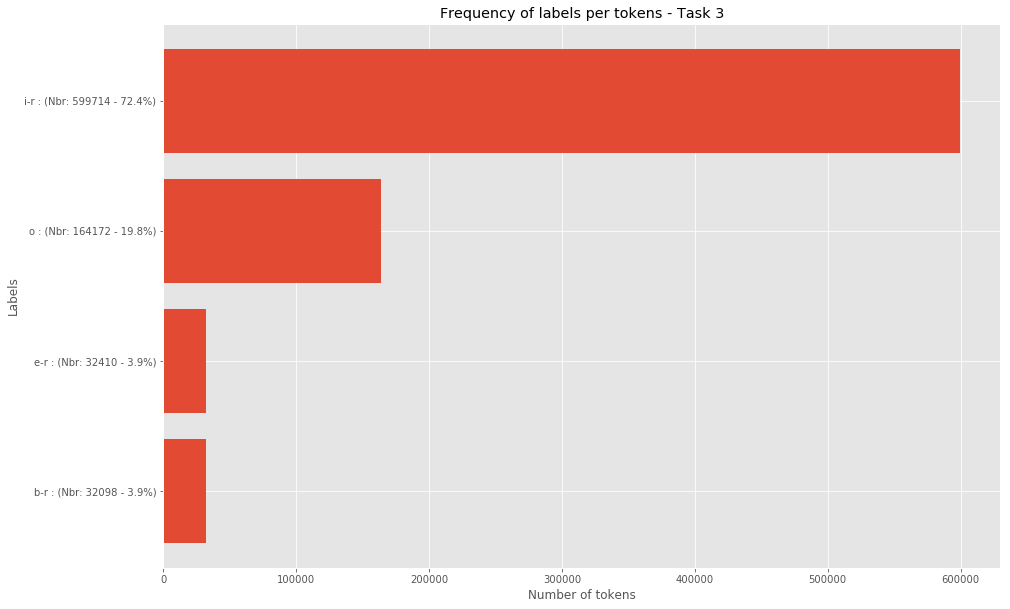

In [14]:
for i, t in enumerate([train_t1, train_t2, train_t3]):
    x = np.hstack(t)
    unique, counts = np.unique(x, return_counts=True)
    values = dict(zip(unique, counts))
    values = OrderedDict(sorted(values.items(), key=itemgetter(1)))

    plt.figure(figsize=(15, 10))
    plt.barh(range(len(values)), values.values(), align='center')
    plt.title("Frequency of labels per tokens - Task {}".format(i + 1))
    plt.xlabel("Number of tokens")
    plt.ylabel("Labels")
    plt.yticks(range(len(values)), list(map(lambda x: "{0} : (Nbr: {1} - {2:.1f}%)".format(x[0],x[1], 100*x[1]/sum(values.values())), values.items())))

### Label per position in sequence - Training Data - Task 1

In [15]:
def label_per_position(data, n=4):
    for position in range(n):
        dd = dict()
        for s in data:
            if len(s) > position:
                dd[s[position]] = dd.get(s[position], 0) + 1

        values = OrderedDict(
            sorted(dd.items(), key=itemgetter(1), reverse=True))

        # Print plot
        plt.figure(figsize=(20, 5))
        plt.title("Number of labels in position {}".format(position + 1))
        plt.ylabel("Number of tokens")
        plt.xlabel("Labels")
        plt.bar(range(len(values)), values.values(), align='center')
        plt.xticks(range(len(values)), values.keys(), fontsize=12, rotation=90)
        plt.show()

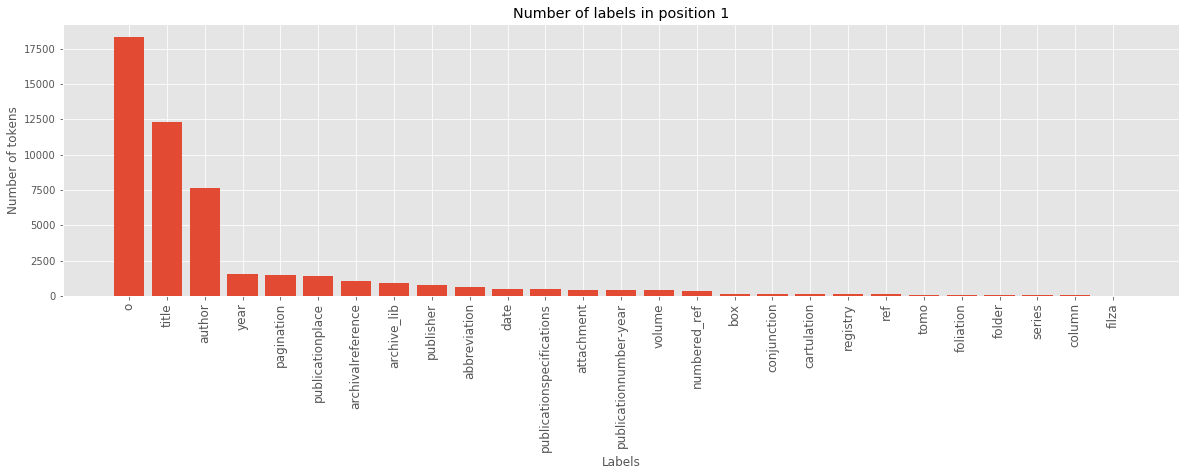

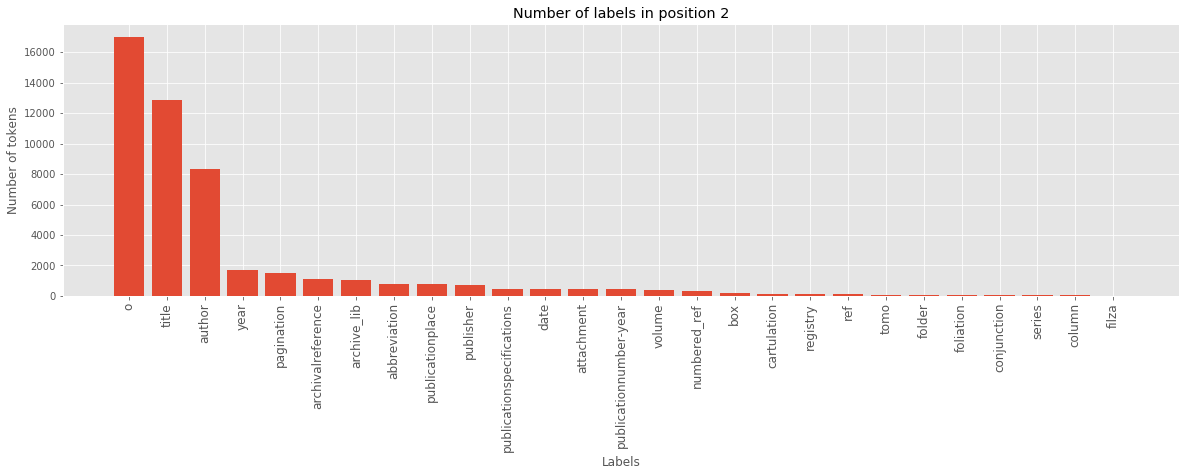

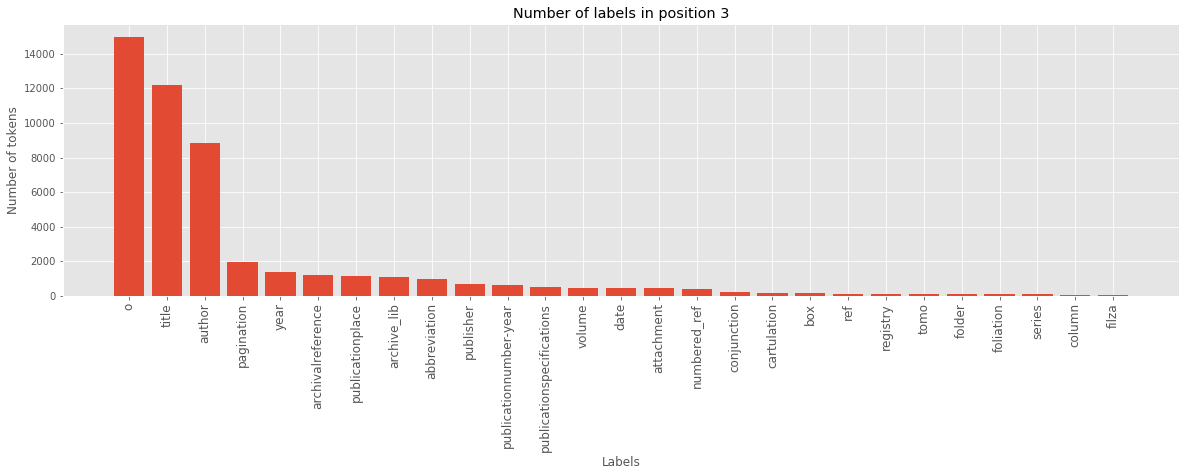

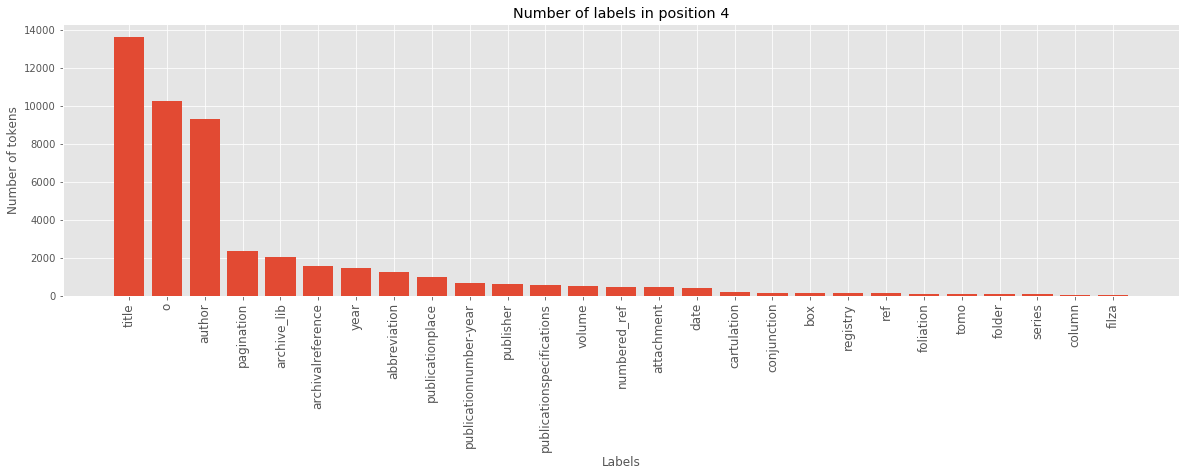

In [16]:
label_per_position(train_t1)

### Where are labels located in sequence ?

In [17]:
def position_for_label(data, label):
    dd = {}
    dd2 = {}
    for d in data:
        for i, l in enumerate(d):
            if l == label:
                dd[i] = dd.get(i, 0) + 1
                j = round(i / len(d), 1)
                dd2[j] = dd2.get(j, 0) + 1

    values = OrderedDict(sorted(dd.items(), key=itemgetter(0), reverse=False))
    values2 = OrderedDict(
        sorted(dd2.items(), key=itemgetter(0), reverse=False))

    # Print plots
    plt.figure(figsize=(20, 5))
    plt.title("Number of labels per position - Label: {}".format(label))
    plt.ylabel("Number of tokens")
    plt.xlabel("Position in sequence")
    plt.bar(range(len(values)), values.values(), align='center')
    plt.xticks(range(len(values)), values.keys(), fontsize=12, rotation=90)
    plt.show()

    plt.figure(figsize=(20, 5))
    plt.title("Number of labels per position - Label: {}".format(label))
    plt.ylabel("Number of tokens")
    plt.xlabel("Position in sequence")
    plt.bar(range(len(values2)), values2.values(), align='center')
    plt.xticks(
        range(len(values2)),
        ["Begin", "", "", "", "", "Middle", "", "", "", "", "End"],
        fontsize=12,
        rotation=90)
    plt.show()

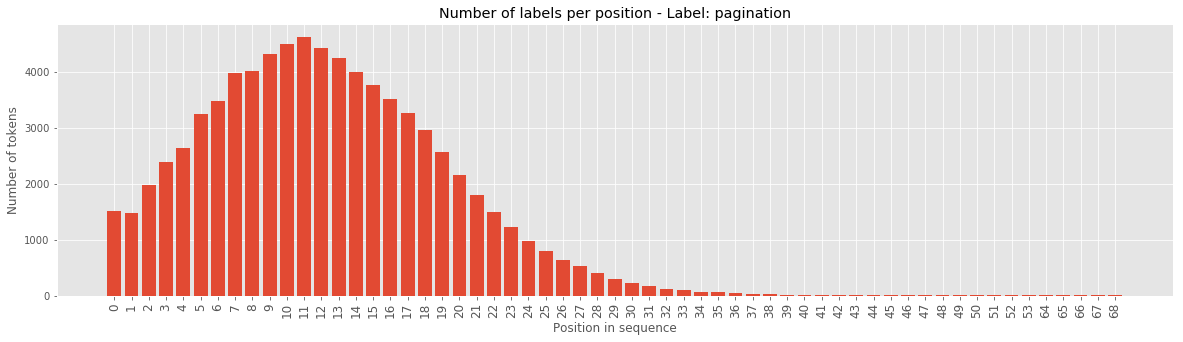

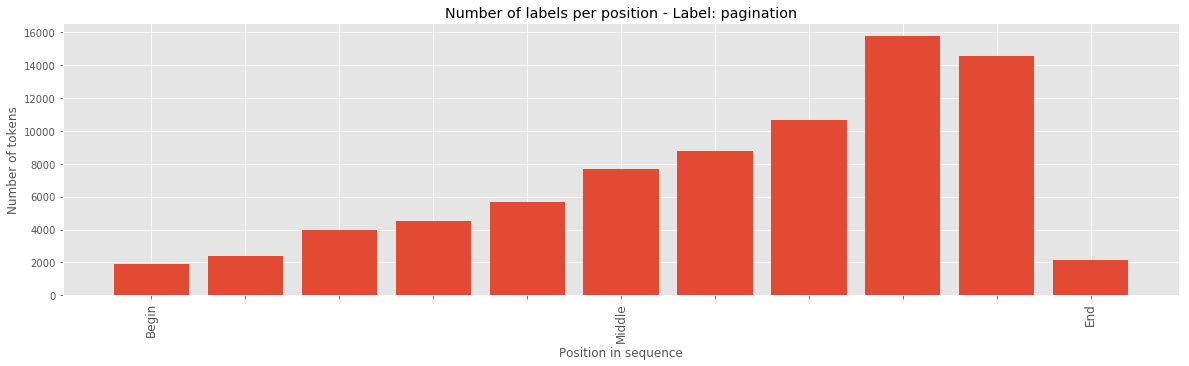

In [18]:
position_for_label(train_t1, "pagination")

> Inside the training data, the `pagination` tokens are mostly at the end of the line/sequence.

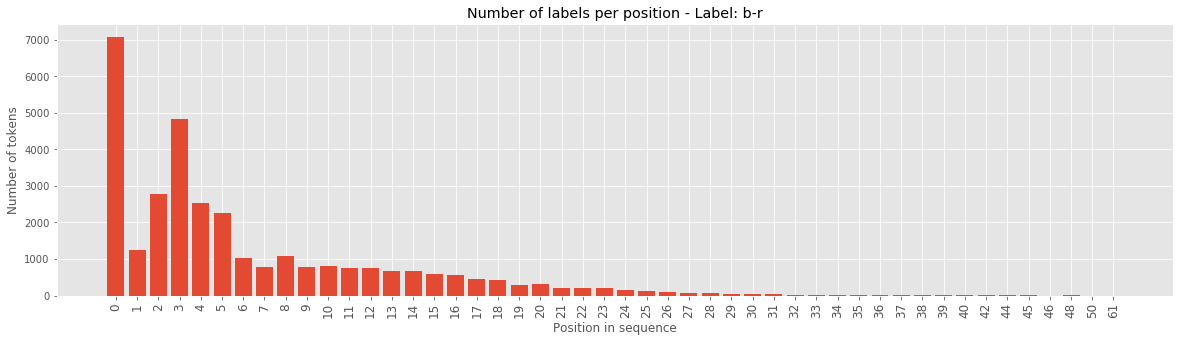

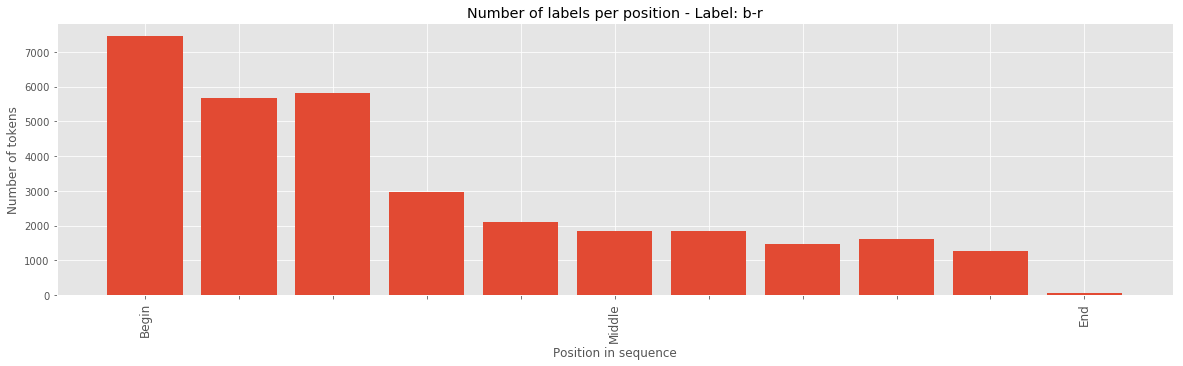

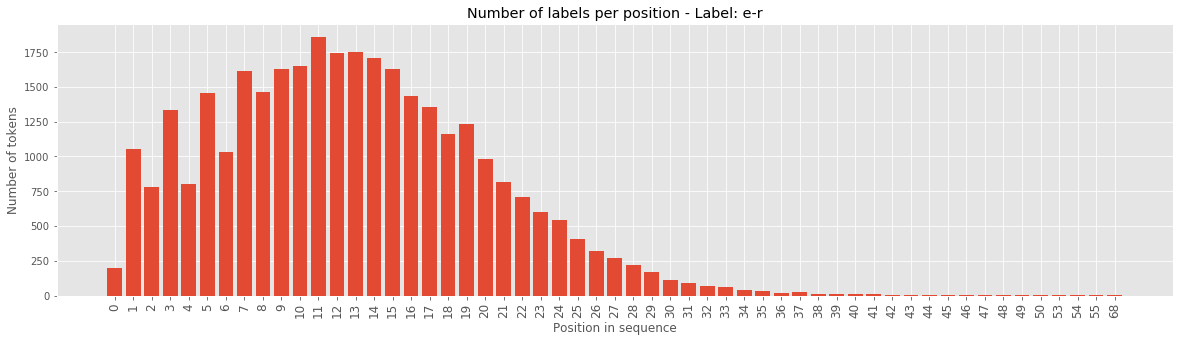

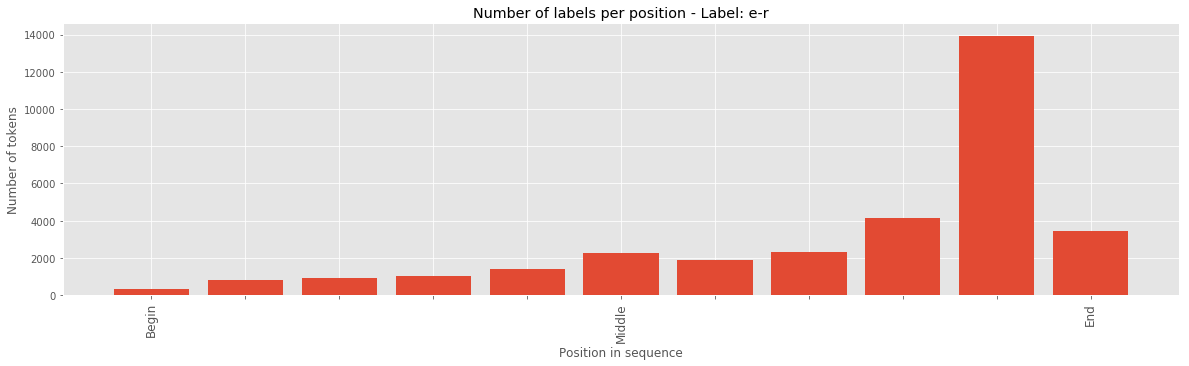

In [19]:
position_for_label(train_t3, "b-r")

position_for_label(train_t3, "e-r")

> The **begin** tags are mostly concentrated at the begin of the line, while **end** tags are at the end.